## Matrix Factorization
*ref: http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/


In this exercise, we will implement matrix factorization using stochastic gradient descent.

Recall from the lecture, the error of entry i,j is given by 
$$e_{ij} = r_{ij} - p{ij}$$
$$e_{ij}^2 = (r_{ij} - p_{ij})^2 = (r_{ij} - \sum_{k=1}^K u_{ik}m_{kj})^2$$

Now the partial derivatives of the square error,
$$\frac{\partial e_{ij}^2}{\partial u_{ik}} = -2(r_{ij} - p_{ij})(m_{kj}) = -2e_{ij}m_{kj}$$
$$\frac{\partial e_{ij}^2}{\partial m_{kj}} = -2(r_{ij} - p_{ij})(u_{ik}) = -2e_{ij}u_{ik}$$

The update rules are:
$$u_{ik}^{t+1} = u_{ik}^{t} - \gamma \frac{\partial e_{ij}^2}{\partial u_{ik}} = u_{ik}^{t} + 2 \gamma e_{ij}m_{kj}$$
$$m_{kj}^{t+1} = m_{kj}^{t} - \gamma \frac{\partial e_{ij}^2}{\partial m_{kj}} = m_{kj}^{t} + 2 \gamma e_{ij}u_{ik}$$

In addition, we will introduce a regularization term to the error term to restrict the norm of the U and M.
$$e_{ij}^2 = (r_{ij} - \sum_{k=1}^K u_{ik}m_{kj})^2 + \frac{\beta}{2}\sum_{k=1}^K(|u_{k}|^2 + |m_{k}|^2)$$

The update rules now become.
$$u_{ik}^{t+1} = u_{ik}^{t} + \gamma(2*e_{ij}m_{kj} - \beta u_{ij})$$
$$m_{kj}^{t+1} =  m_{kj}^{t} + \gamma(2*e_{ij}u_{ik} - \beta m_{kj})$$



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def matrix_factorization(R, U, M, K, max_iter=7000, learning_rate=1e-4, beta=0.02, tol=1e-3):
    M = M.T
    U = np.copy(U)
    M = np.copy(M)
    x,y = np.nonzero(R)
    for it in range(max_iter):
        # create a random ordering
        order = np.random.permutation(len(x))
        for step in range(len(order)):
            i = x[order[step]]
            j = y[order[step]]
            eij = R[i,j] - np.dot(U[i,:],M[:,j])
            for k in range(K):
                U[i,k] = U[i,k] + learning_rate*(2*eij*M[k,j] - beta*U[i,k])
                M[k,j] = M[k,j] + learning_rate*(2*eij*U[i,k] - beta*M[k,j])
        # calculate the error
        P = np.dot(U,M)
        e2 = 0
        for step in range(len(order)):
            i = x[order[step]]
            j = y[order[step]]
            e2 += pow(R[i,j] - P[i,j],2)
            for k in range(K):
                e2 += beta/2.0 * (pow(U[i,k],2) + pow(M[k,j],2))
        if e2 < tol:
            break
    return U,M.T   

In [4]:
R = [[5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4]];

R = np.array(R)
I,J = R.shape
K = 5
U = np.random.rand(I,K)
M = np.random.rand(J,K)
nU, nM = matrix_factorization(R,U,M,K)
P = np.dot(nU,nM.T)

In [5]:
U

array([[0.77477065, 0.12224586, 0.17871325, 0.51220667, 0.48125471],
       [0.01038221, 0.14745114, 0.45686213, 0.02404972, 0.63550613],
       [0.92150696, 0.25490223, 0.40211775, 0.36770239, 0.20446956],
       [0.50730407, 0.02347917, 0.59709865, 0.23994137, 0.30659132],
       [0.83435319, 0.14146713, 0.62527103, 0.35602297, 0.8573731 ]])

In [6]:
M

array([[0.23603925, 0.41515801, 0.36909459, 0.82125742, 0.30788485],
       [0.15271146, 0.1565182 , 0.35277026, 0.27641342, 0.34219445],
       [0.53666713, 0.20823144, 0.02853463, 0.10771943, 0.72327582],
       [0.58133496, 0.77638873, 0.02331871, 0.36490055, 0.45230049]])

In [8]:
np.dot(U,M.T)

array([[0.86841429, 0.50675827, 0.84960339, 0.95405518],
       [0.44770519, 0.40994598, 0.51154898, 0.42738387],
       [0.8366874 , 0.49408292, 0.74659201, 0.96964079],
       [0.64132557, 0.46302158, 0.54177695, 0.55329226],
       [1.04281417, 0.76193235, 1.15353753, 1.12715593]])

In [9]:
P

array([[5.00182445, 2.92699311, 3.25847068, 1.00483056],
       [3.96414014, 2.00800752, 2.85817908, 1.00014526],
       [1.03994146, 0.89773875, 3.78611154, 4.97382023],
       [0.98018978, 0.70518954, 3.26668799, 3.98090544],
       [2.4604018 , 1.12138656, 4.95957585, 3.99261874]])

In [10]:
R

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])

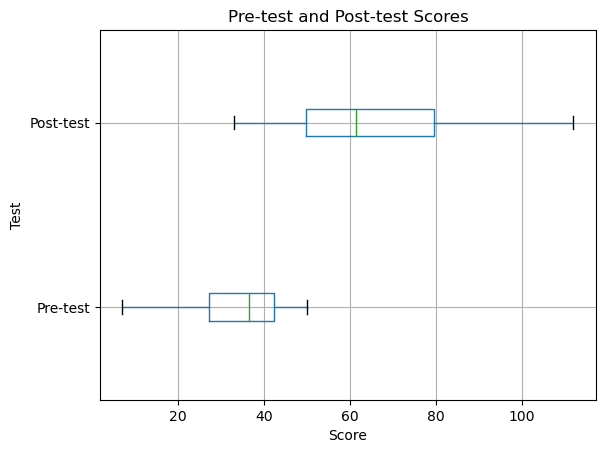

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the pre-test and post-test scores data
data = {'Pre-test': [40,23,43,30,7,40,15,25,23,29,45,46,46,38,50,34,28,35,42,40],
        'Post-test': [34,57,51,79,47,36,62,72,49,101,75,33,81,112,66,50,56,61,84,108]}
df = pd.DataFrame(data)

# Draw the box plot
fig, ax = plt.subplots()
df.boxplot(ax=ax, vert=False)

# Set plot title and labels
ax.set_title('Pre-test and Post-test Scores')
ax.set_xlabel('Score')
ax.set_ylabel('Test')

# Show the plot
plt.show()

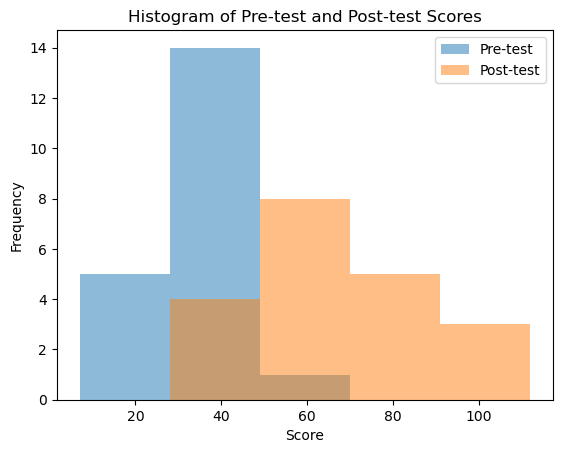

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# create a pandas dataframe with the data
df = pd.DataFrame({'Pre-test': [40, 23, 43, 30, 7, 40, 15, 25, 23, 29, 45, 46, 46, 38, 50, 34, 28, 35, 42, 40],
                   'Post-test': [34, 57, 51, 79, 47, 36, 62, 72, 49, 101, 75, 33, 81, 112, 66, 50, 56, 61, 84, 108]})

# plot the histogram with 5 bins
df.plot.hist(bins=5, alpha=0.5)

# add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Pre-test and Post-test Scores')

# show the plot
plt.show()

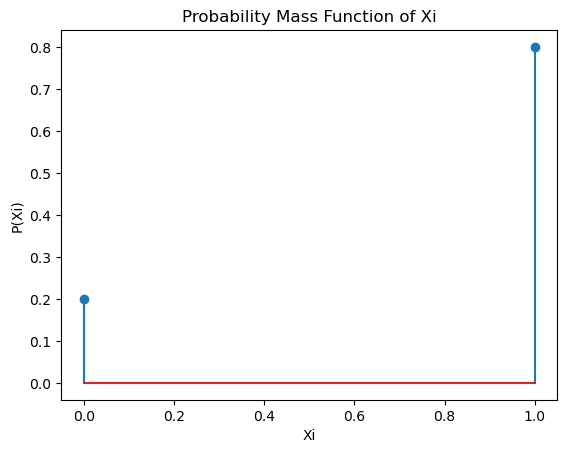

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# load the data
data = np.array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# calculate the PMF
values, counts = np.unique(data, return_counts=True)
pmf = counts / len(data)

# plot the PMF
plt.stem(values, pmf)
plt.xlabel('Xi')
plt.ylabel('P(Xi)')
plt.title('Probability Mass Function of Xi')
plt.show()

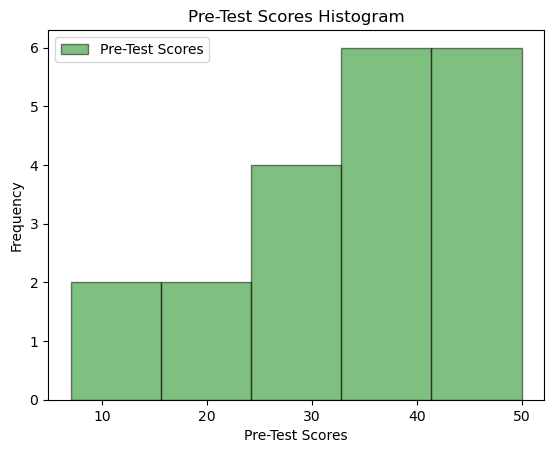

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

pre_test_scores = [40, 23, 43, 30, 7, 40, 15, 25, 23, 29, 45, 46, 46, 38, 50, 34, 28, 35, 42, 40]
pre_test_df = pd.DataFrame(pre_test_scores, columns=["Pre-Test Scores"])

# Create a histogram using pandas
pre_test_df.plot(kind="hist", bins=5, alpha=0.5, color="green", edgecolor="black")

# Add labels and title
plt.title("Pre-Test Scores Histogram")
plt.xlabel("Pre-Test Scores")
plt.ylabel("Frequency")

# Show the plot
plt.show()